In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from matplotlib.cm import rainbow
from sklearn.tree import export_graphviz

In [2]:
df = pd.read_csv('F:\\ML\\Kaggle\\Heart_Disease_Prediction\\heart.csv')

In [3]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [4]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
df.shape

(303, 14)

In [7]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

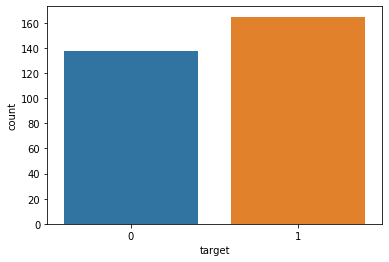

In [8]:
sns.countplot(x='target',data=df)

In [9]:
have_disease = len(df[df.target == 1])
does_not_have_disease = len(df[df.target == 0])
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((have_disease / (len(df.target))*100)))
print("Percentage of Patients Not Having Heart Disease: {:.2f}%".format((does_not_have_disease / (len(df.target))*100)))

Percentage of Patients Have Heart Disease: 54.46%
Percentage of Patients Not Having Heart Disease: 45.54%


Text(0.5, 0, 'Sex(0=Female, 1=Male)')

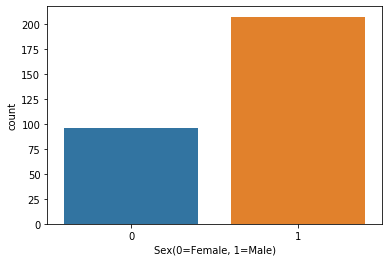

In [10]:
sns.countplot(x='sex',data=df)
plt.xlabel("Sex(0=Female, 1=Male)")

In [11]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [12]:
df.groupby('target').mean()

age       sex        cp    trestbps        chol       fbs  \
target                                                                    
0       56.601449  0.826087  0.478261  134.398551  251.086957  0.159420   
1       52.496970  0.563636  1.375758  129.303030  242.230303  0.139394   

         restecg     thalach     exang   oldpeak     slope        ca      thal  
target                                                                          
0       0.449275  139.101449  0.550725  1.585507  1.166667  1.166667  2.543478  
1       0.593939  158.466667  0.139394  0.583030  1.593939  0.363636  2.121212

In [13]:
pd.crosstab(df.sex,df.target)

target    0   1
sex            
0        24  72
1       114  93

Text(0, 0.5, 'Frequency')

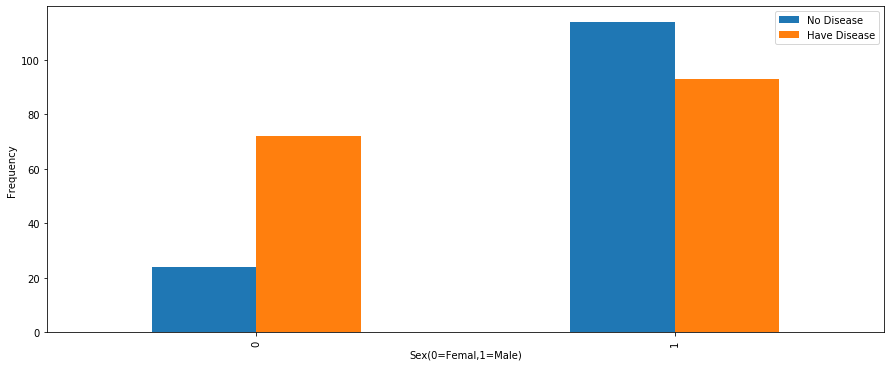

In [14]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6))
plt.xlabel('Sex(0=Femal,1=Male)')
plt.legend(["No Disease", "Have Disease"])
plt.ylabel('Frequency')

In [15]:
df.slope.value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [16]:
pd.crosstab(df.slope,df.target)

target   0    1
slope          
0       12    9
1       91   49
2       35  107

Text(0, 0.5, 'Frequency')

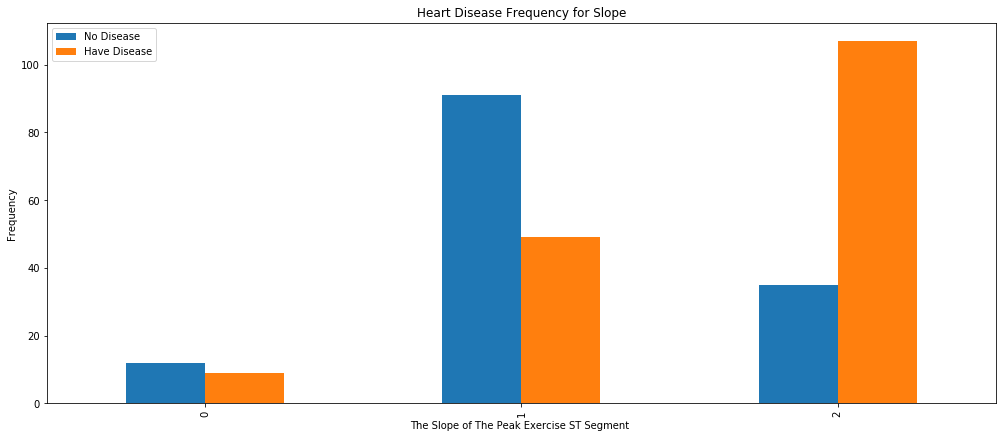

In [17]:
pd.crosstab(df.slope,df.target).plot(kind='bar',figsize=(17,7))
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.legend(["No Disease", "Have Disease"])
plt.ylabel('Frequency')

In [18]:
df.fbs.value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [19]:
pd.crosstab(df.fbs,df.target)

target    0    1
fbs             
0       116  142
1        22   23

Text(0, 0.5, 'Frequency')

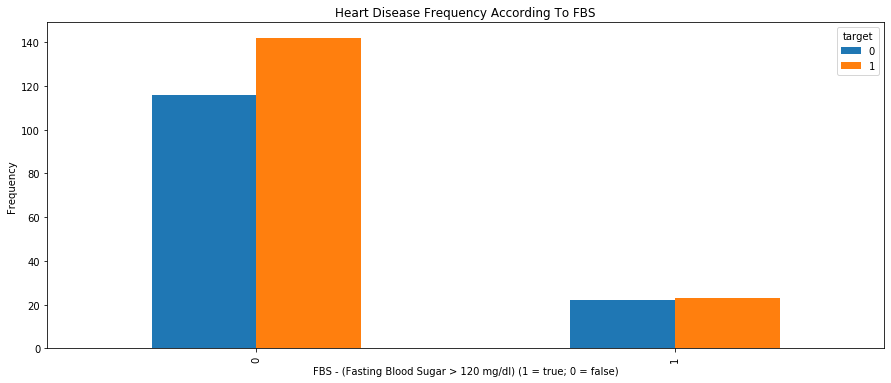

In [20]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.ylabel('Frequency')

In [21]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [23]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

<Figure size 1440x1440 with 0 Axes>

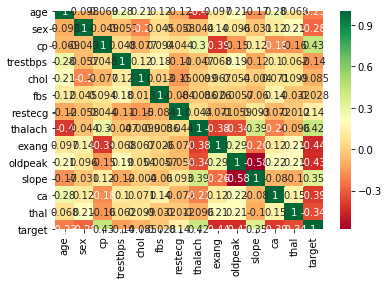

<Figure size 1440x1440 with 0 Axes>

In [24]:
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")
plt.figure(figsize=(20,20))

In [25]:
data = pd.get_dummies(df, columns=['cp','fbs','slope','thal','ca'])

In [26]:
data

age  sex  trestbps  chol  restecg  thalach  exang  oldpeak  target  cp_0  \
0     63    1       145   233        0      150      0      2.3       1     0   
1     37    1       130   250        1      187      0      3.5       1     0   
2     41    0       130   204        0      172      0      1.4       1     0   
3     56    1       120   236        1      178      0      0.8       1     0   
4     57    0       120   354        1      163      1      0.6       1     1   
5     57    1       140   192        1      148      0      0.4       1     1   
6     56    0       140   294        0      153      0      1.3       1     0   
7     44    1       120   263        1      173      0      0.0       1     0   
8     52    1       172   199        1      162      0      0.5       1     0   
9     57    1       150   168        1      174      0      1.6       1     0   
10    54    1       140   239        1      160      0      1.2       1     1   
11    48    0       130   275        1      139      0      0.2       1     0   
12    49    1       130   266        1      171      0      0.6       1     0   
13    64    1       110   211        0      144      1      1.8       1     0   
14    58    0       150   283        0      162      0      1.0       1     0   
15    50    0       120   219        1      158      0      1.6       1     0   
16    58    0       120   340        1      172      0      0.0       1     0   
17    66    0       150   226        1      114      0      2.6       1     0   
18    43    1       150   247        1      171      0      1.5       1     1   
19    69    0       140   239        1      151      0      1.8       1     0   
20    59    1       135   234        1      161      0      0.5       1     1   
21    44    1       130   233        1      179      1      0.4       1     0   
22    42    1       140   226        1      178      0      0.0       1     1   
23    61    1       150   243        1      137      1      1.0       1     0   
24    40    1       140   199        1      178      1      1.4       1     0   
25    71    0       160   302        1      162      0      0.4       1     0   
26    59    1       150   212        1      157      0      1.6       1     0   
27    51    1       110   175        1      123      0      0.6       1     0   
28    65    0       140   417        0      157      0      0.8       1     0   
29    53    1       130   197        0      152      0      1.2       1     0   
..   ...  ...       ...   ...      ...      ...    ...      ...     ...   ...   
273   58    1       100   234        1      156      0      0.1       0     1   
274   47    1       110   275        0      118      1      1.0       0     1   
275   52    1       125   212        1      168      0      1.0       0     1   
276   58    1       146   218        1      105      0      2.0       0     1   
277   57    1       124   261        1      141      0      0.3       0     0   
278   58    0       136   319        0      152      0      0.0       0     0   
279   61    1       138   166        0      125      1      3.6       0     1   
280   42    1       136   315        1      125      1      1.8       0     1   
281   52    1       128   204        1      156      1      1.0       0     1   
282   59    1       126   218        1      134      0      2.2       0     0   
283   40    1       152   223        1      181      0      0.0       0     1   
284   61    1       140   207        0      138      1      1.9       0     1   
285   46    1       140   311        1      120      1      1.8       0     1   
286   59    1       134   204        1      162      0      0.8       0     0   
287   57    1       154   232        0      164      0      0.0       0     0   
288   57    1       110   335        1      143      1      3.0       0     1   
289   55    0       128   205        2      130      1      2.0       0     1   
290   61    1       148   203       

In [27]:
sc = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[columns_to_scale] = sc.fit_transform(data[columns_to_scale])

In [28]:
data

age  sex  trestbps      chol  restecg   thalach  exang   oldpeak  \
0    0.952197    1  0.763956 -0.256334        0  0.015443      0  1.087338   
1   -1.915313    1 -0.092738  0.072199        1  1.633471      0  2.122573   
2   -1.474158    0 -0.092738 -0.816773        0  0.977514      0  0.310912   
3    0.180175    1 -0.663867 -0.198357        1  1.239897      0 -0.206705   
4    0.290464    0 -0.663867  2.082050        1  0.583939      1 -0.379244   
5    0.290464    1  0.478391 -1.048678        1 -0.072018      0 -0.551783   
6    0.180175    0  0.478391  0.922521        0  0.146634      0  0.224643   
7   -1.143291    1 -0.663867  0.323431        1  1.021244      0 -0.896862   
8   -0.260980    1  2.306004 -0.913400        1  0.540209      0 -0.465514   
9    0.290464    1  1.049520 -1.512490        1  1.064975      0  0.483451   
10  -0.040403    1  0.478391 -0.140381        1  0.452748      0  0.138373   
11  -0.702136    0 -0.092738  0.555337        1 -0.465593      0 -0.724323   
12  -0.591847    1 -0.092738  0.381407        1  0.933783      0 -0.379244   
13   1.062485    1 -1.234996 -0.681494        0 -0.246940      1  0.655990   
14   0.400752    0  1.049520  0.709940        0  0.540209      0 -0.034166   
15  -0.481558    0 -0.663867 -0.526890        1  0.365287      0  0.483451   
16   0.400752    0 -0.663867  1.811493        1  0.977514      0 -0.896862   
17   1.283063    0  1.049520 -0.391612        1 -1.558855      0  1.346147   
18  -1.253580    1  1.049520  0.014223        1  0.933783      0  0.397182   
19   1.613930    0  0.478391 -0.140381        1  0.059173      0  0.655990   
20   0.511041    1  0.192827 -0.237008        1  0.496478      0 -0.465514   
21  -1.143291    1 -0.092738 -0.256334        1  1.283627      1 -0.551783   
22  -1.363869    1  0.478391 -0.391612        1  1.239897      0 -0.896862   
23   0.731619    1  1.049520 -0.063079        1 -0.553054      1 -0.034166   
24  -1.584446    1  0.478391 -0.913400        1  1.239897      1  0.310912   
25   1.834507    0  1.620649  1.077125        1  0.540209      0 -0.551783   
26   0.511041    1  1.049520 -0.662169        1  0.321556      0  0.483451   
27  -0.371269    1 -1.234996 -1.377212        1 -1.165281      0 -0.379244   
28   1.172774    0  0.478391  3.299555        0  0.321556      0 -0.206705   
29  -0.150692    1 -0.092738 -0.952051        0  0.102904      0  0.138373   
..        ...  ...       ...       ...      ...       ...    ...       ...   
273  0.400752    1 -1.806125 -0.237008        1  0.277826      0 -0.810592   
274 -0.812425    1 -1.234996  0.555337        0 -1.383933      1 -0.034166   
275 -0.260980    1 -0.378302 -0.662169        1  0.802592      0 -0.034166   
276  0.400752    1  0.821069 -0.546216        1 -1.952430      0  0.828529   
277  0.290464    1 -0.435415  0.284780        1 -0.378132      0 -0.638053   
278  0.400752    0  0.249940  1.405658        0  0.102904      0 -0.896862   
279  0.731619    1  0.364165 -1.551141        0 -1.077820      1  2.208842   
280 -1.363869    1  0.249940  1.328356        1 -1.077820      1  0.655990   
281 -0.260980    1 -0.206964 -0.816773        1  0.277826      1 -0.034166   
282  0.511041    1 -0.321189 -0.546216        1 -0.684245      0  1.001069   
283 -1.584446    1  1.163746 -0.449589        1  1.371088      0 -0.896862   
284  0.731619    1  0.478391 -0.758796        0 -0.509323      1  0.742260   
285 -0.922713    1  0.478391  1.251054        1 -1.296472      1  0.655990   
286  0.511041    1  0.135714 -0.816773        1  0.540209      0 -0.206705   
287  0.290464    1  1.277972 -0.275659        0  0.627670      0 -0.896862   
288  0.290464    1 -1.234996  1.714865        1 -0.290671      1  1.691225   
289  0.069886    0 -0.206964 -0.797447        2 -0.859167      1  0.828529   
290  0.731619    1  0.935294 -0.836098        1  0.496478      0 -0.896862   
291  0.400752    1 -1.006544  1.386332        2 -0.421862      0  2.898999   
292  0.400752    0  2.191778 -0.

In [29]:
X = data.drop(['target'],axis=1)
y = data['target']

In [30]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0, 0.5, 'Scores')

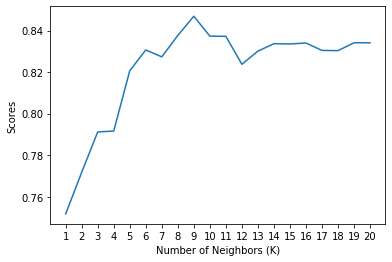

In [31]:
plt.plot([k for k in range(1,21)], knn_scores)
plt.xticks([k for k in range(1,21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')

In [32]:
knn_classifier = KNeighborsClassifier(n_neighbors=9)
score = cross_val_score(knn_classifier,X,y,cv=10)

In [33]:
score

array([0.87096774, 0.83870968, 0.83870968, 0.96774194, 0.93548387,
       0.7       , 0.9       , 0.9       , 0.68965517, 0.82758621])

In [34]:
score.mean()

0.8468854282536151

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=10) 

In [36]:
rfc = RandomForestClassifier()

In [37]:
rfc.fit(X_train,y_train)

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
rfc.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1890002045, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=639420762, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                  

In [39]:
y_predict = rfc.predict(X_test)

In [40]:
y_predict

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [42]:
print(confusion_matrix(y_test,y_predict))

[[29  6]
 [ 4 22]]


In [43]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85        35
           1       0.79      0.85      0.81        26

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.84      0.84      0.84        61



In [44]:
cf = confusion_matrix(y_test,y_predict)

In [45]:
total = sum(sum(cf))

In [47]:
sensitivity = cf[0,0]/(cf[0,0] + cf[1,0])
print('Sensitivity/Recall : ', sensitivity)

specificity = cf[1,1]/(cf[1,1] + cf[0,1])
print('Specifity : ', specificity)

Sensitivity/Recall :  0.8787878787878788
Specifity :  0.7857142857142857


In [48]:
y_pred_prob = rfc.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)


In [49]:
auc(fpr,tpr)

0.9203296703296703

Text(0.5, 1.0, 'ROC Curve')

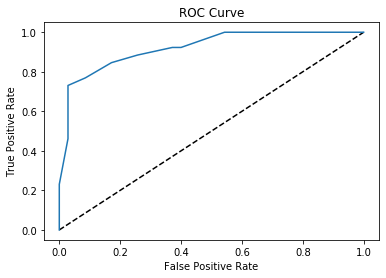

In [52]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [53]:
cv_auc = cross_val_score(rfc,X,y,cv=5,scoring='roc_auc')

In [54]:
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.83603896 0.93831169 0.879329   0.8956229  0.84231201]


In [56]:
rfc.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [64]:
params_rfc = {
    'n_estimators' : [10,20,30,50],
    'max_depth':[3,4,5,6,7,8],
}

In [65]:
grid_rfc = GridSearchCV(estimator=rfc,param_grid=params_rfc, cv=3)

In [66]:
grid_rfc.fit(X_train,y_train)

C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='wa

In [67]:
best_hyperparams = grid_rfc.best_params_
print('Best Hyperparameter:\n', best_hyperparams)

Best Hyperparameter:
 {'max_depth': 5, 'n_estimators': 50}


In [69]:
best_model = grid_rfc.best_estimator_

In [70]:
y_pred_of_best_model = best_model.predict(X_test)

In [72]:
print("Accuracy of tuned RFC Best Model = {0:.3f}".format(accuracy_score(y_test,y_pred_of_best_model)))

Accuracy of tuned RFC Best Model = 0.820


In [73]:
print(confusion_matrix(y_test,y_pred_of_best_model))

[[28  7]
 [ 4 22]]


In [75]:
print(classification_report(y_test,y_pred_of_best_model))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84        35
           1       0.76      0.85      0.80        26

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



In [77]:
cf1 = confusion_matrix(y_test,y_pred_of_best_model)

In [78]:
total1 = sum(sum(cf1))

In [79]:
sensitivity = cf1[0,0]/(cf1[0,0] + cf1[1,0])
print('Sensitivity/Recall : ', sensitivity)

specificity = cf1[1,1]/(cf1[1,1] + cf1[0,1])
print('Specifity : ', specificity)

Sensitivity/Recall :  0.875
Specifity :  0.7586206896551724


In [81]:
y_pred_prob1 = best_model.predict_proba(X_test)[:,1]
fpr1,tpr1,thresholds1 = roc_curve(y_test, y_pred_prob1)


In [82]:
auc(fpr1,tpr1)

0.9043956043956044

# Prediction from the Best Model

In [83]:
cf = confusion_matrix(y_test,y_predict)
total = sum(sum(cf))
sensitivity = cf[0,0]/(cf[0,0] + cf[1,0])
print('Sensitivity/Recall : ', sensitivity)

specificity = cf[1,1]/(cf[1,1] + cf[0,1])
print('Specifity : ', specificity)


y_pred_prob = rfc.predict_proba(X_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)


auc(fpr,tpr)

Sensitivity/Recall :  0.8787878787878788
Specifity :  0.7857142857142857


0.9203296703296703